# K-Nearest Neighbors in R-programing

## Importing the dataset

In [1]:
dataset = read.csv('Social_Network_Ads.csv')
head(dataset)

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0


In [2]:
dataset = dataset[3:5]

# Encoding the target feature as factor

In [3]:
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

# Splitting the dataset into the Training set and Test set
# install.packages('caTools')

In [6]:
install.packages('caTools')
library(caTools)

also installing the dependency 'bitops'



package 'bitops' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bimalgupta\AppData\Local\Temp\RtmpeMmXJ4\downloaded_packages


Warning message:
"package 'caTools' was built under R version 3.6.1"

In [7]:
set.seed(123)

In [8]:
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

# Feature Scaling

In [9]:
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

# Fitting K-NN to the Training set and Predicting the Test set results

In [10]:
library(class)
y_pred = knn(train = training_set[, -3],
             test = test_set[, -3],
             cl = training_set[, 3],
             k = 5,
             prob = TRUE)

# Making the Confusion Matrix

In [12]:
cm = table(test_set[, 3], y_pred)

In [13]:
cm

   y_pred
     0  1
  0 59  5
  1  6 30

# Visualising the Training set results

In [15]:
install.packages('ElemStatLearn')

package 'ElemStatLearn' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bimalgupta\AppData\Local\Temp\RtmpeMmXJ4\downloaded_packages


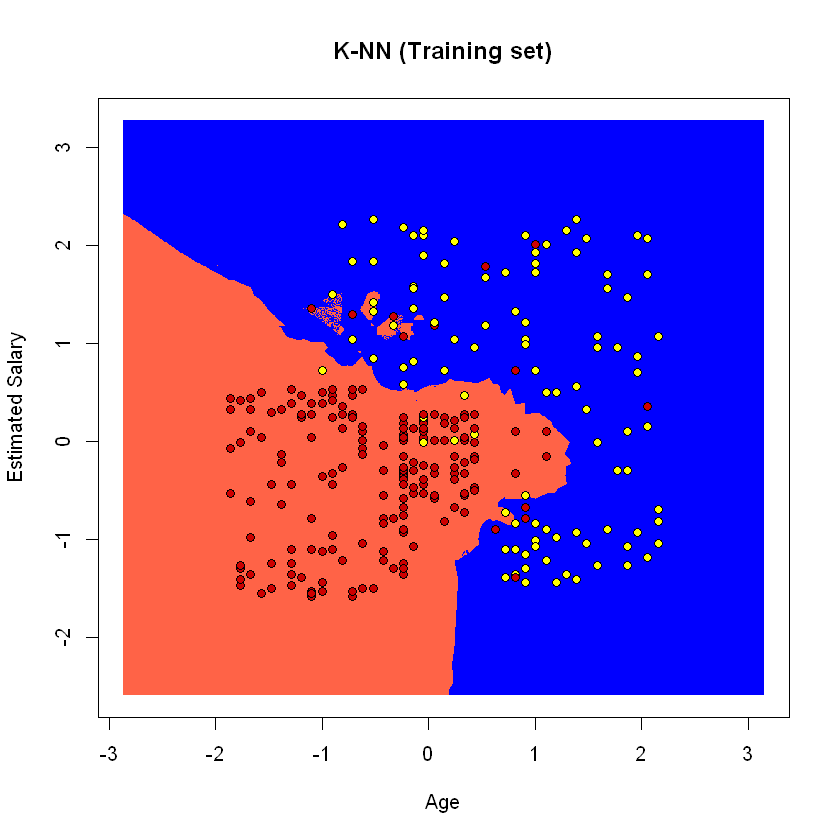

In [18]:
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = knn(train = training_set[, -3], test = grid_set, cl = training_set[, 3], k = 5)
plot(set[, -3],
     main = 'K-NN (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'blue', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'yellow', 'red3'))


# Visualising the Test set results

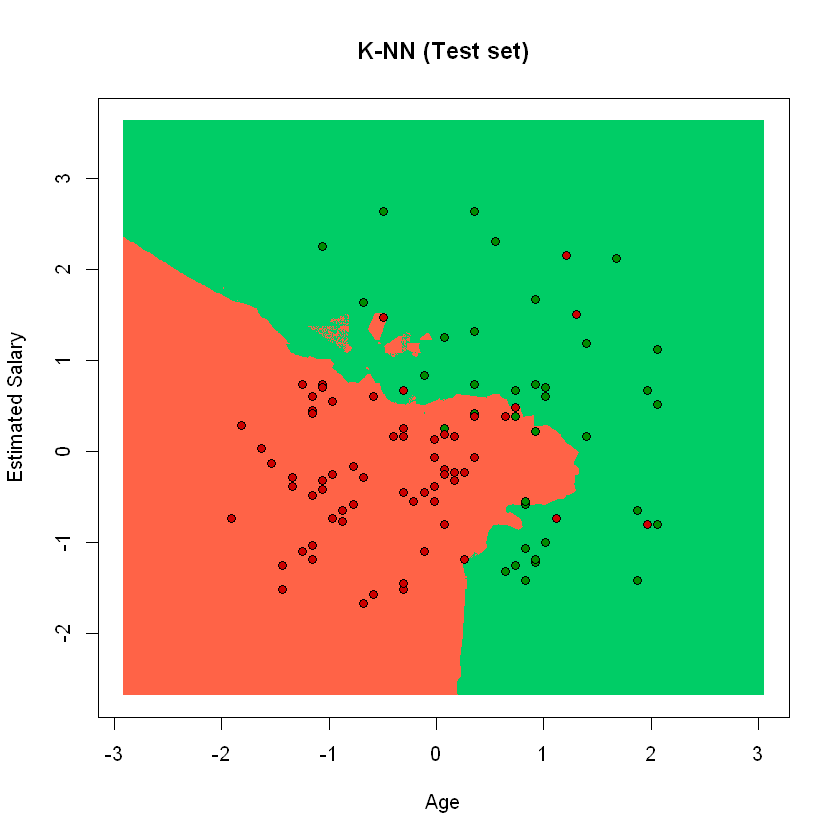

In [17]:
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = knn(train = training_set[, -3], test = grid_set, cl = training_set[, 3], k = 5)
plot(set[, -3],
     main = 'K-NN (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'blue', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'g', 'red3'))